In [1]:
import pandas as pd
import numpy as np

## Data Preprocessing

In [2]:
data = pd.read_csv('corona_dataset.csv')
data.tail()


,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
10709,22691,Bengaluru,Male,Mr,ashish,NO,2.0,Business,Car,8,...,24.0,209.0,61.0,56.0,35,7,4000000.0,300000,0.0,41.981760
10710,22692,Bengaluru,Male,Mr,mohd mujahid ansari,YES,0.0,Manufacturing,Car,8,...,134.0,211.0,65.0,47.0,35,7,1500000.0,700000,NaN,47.148663
10711,22693,Bengaluru,Male,Mr,munnakumar,YES,0.0,Clerk,Public,8,...,151.0,296.0,87.0,37.0,16,5,3000000.0,2100000,2.0,47.708533
10712,22694,Bengaluru,Male,Mr,prakash,YES,1.0,Legal,Walk,8,...,110.0,253.0,56.0,70.0,28,5,2900000.0,700000,1.0,53.803565
10713,22695,Bengaluru,Male,Mr,mehboob mehandi,NO,2.0,Business,Car,8,...,134.0,201.0,82.0,60.0,4,3,2100000.0,1400000,0.0,68.342400


In [3]:
""" 
perfrom data preprocessing on 'data' Dataframe
The final dataframe must be named data
eg .... data =  {preprocessed data}    

"""
data["Infect_Prob"]=(data["Infect_Prob"]-data["Infect_Prob"].min())/(data["Infect_Prob"].max()-data["Infect_Prob"].min())
"""normalising the Infect prob data"""
data=data.dropna()





In [ ]:

"""to make all the columns visible for further operations"""
pd.set_option("display.max_columns",None)
"""convert all string data type values to numeric values for the regressor function to work"""
data.replace(to_replace=["Bhubaneshwar","Chandigarh",'Chennai','Delhi','Bengaluru'],value=[0,1,2,3,4],inplace=True)
data.replace(to_replace=["Female","Male"],value=[0,1],inplace=True)
data.replace(to_replace=["Mrs","Mr"],value=[0,1],inplace=True)
data.replace(to_replace=["YES","NO"],value=[1,0],inplace=True)
data.replace(to_replace=['Farmer', 'Cleaner', 'Driver', 'Manufacturing', 'Clerk','Business', 'Sales', 'Researcher', 'Legal'],value=[0,1,2,3,4,5,6,7,8],inplace=True)
data.replace(to_replace=['Public', 'Car', 'Walk'],value=[0,1,2],inplace=True)
data.replace(to_replace=['Hypertension', 'None', 'Coronary Heart Disease', 'Diabetes'],value=[1,0,2,3],inplace=True)
data.replace(to_replace=['<400', '<300', '<200', '<100'],value=[4,3,2,1],inplace=True)
data.replace(to_replace=['Normal', 'Elevated', 'Stage-01', 'Stage-02'],value=[-1,0,1,2],inplace=True)
data.set_index("Name",inplace=True)


In [5]:
""" separating features and target """

Y = data['Infect_Prob']
X = data.drop(['Infect_Prob'],axis=1)

In [6]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_Y,test_Y = train_test_split(X,Y)

print("Training Size : ",train_X.shape)
print("Testing Size : ",test_X.shape)

Training Size :  (5082, 26)
Testing Size :  (1695, 26)


### Regression to predict the probability of Corona Infection

In [7]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [8]:
""" regression works with numeric values,
make sure you map all the string values in the data to some numeric value if required
"""

regressor.fit(train_X,train_Y)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

### Performance evaluation

In [116]:
""" complete the function RMSE 
    
    The Root Mean Square Error is defined in the following way
    sqrt(summation((y_pred[i]-y_true[i])^2)/N)
    where:
         i varies from 0 to N
         
    (use numpy)     

"""

def RMSE(y_pred,y_true):
    
    rmse = 0.0
    """finding rmse value as per above given instruction"""
    rmse=np.sqrt(((y_pred-y_true)**2).mean())
    # return rmse
    
    return rmse
    
    

y_pred = regressor.predict(test_X)

print("Root Mean Square Error = ",RMSE(y_pred,test_Y))



Root Mean Square Error =  0.1391564237047013



# BONUS


In [110]:
import matplotlib.pyplot as plt

In [111]:
import seaborn as snp

In [112]:
%matplotlib inline

In [113]:
"""to make graph more visible"""
snp.set_context('poster')

In [114]:
"""setting threshold value for possitive test >.7
   defining a function countt to count total possitive cases for every occupation where occupation are resembled by numbers"""
l=list()
def countt():
    for i in data["Occupation"].unique():
        data2=data[data['Infect_Prob']>0.7]
        l.append(data2[data2['Occupation']==i]["Infect_Prob"].count())
countt()

    

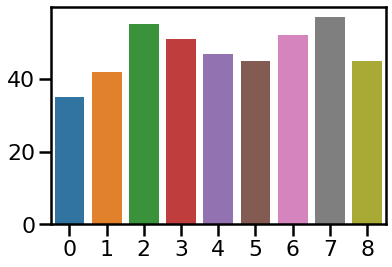

In [115]:
snp.barplot(x=data["Occupation"].unique(),y=l)